In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
#Verify path to data
import os
print(os.listdir('./input'))


FileNotFoundError: [Errno 2] No such file or directory: './input'

In [21]:
# load training data to dataframe
train_df = pd.read_table('train.tsv')

In [22]:
#review training data
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


Condition ID's
1 - New
2 - Like New
3 - Good
4 - Fair
5 - Poor

Clothing
1 - New: NWT (New With Tags), unworn, unaltered and includes the original tags.
2 - Like New: NWOT (New without tags) or very lightly used with no flaws or damage.
3 - Good: Gently used but still may have minor flaws such as pilling, stretching, or loose threads.
4 - Fair: Multiple minor flaws, defects, or damage such as rips, light stains, pilling.
5 - Poor: Heavily used and has major cosmetic flaws or damage such as holes, stains, fading, or missing buttons/beads.

Shoes 
1 - New: New, unworn and still in the original box.
2 - Like New: Unworn or only tried on. No creases, but may not be in the original box.
3 - Good: Used, but there are only a few minor flaws such as slight wear on the sole, light creases, or small scuffs.
4 - Fair: Show signs of wear and has multiple major flaws, such as holes, rips, creases, or stains, but the sole is intact.
5 - Poor: Heavily worn and have multiple major flaws, such as large holes, stains, scuffs, or the soles are not intact.

Electronics
1 - New: Unused in the original packaging.
2 - Like New: lightly used and fully functional, but does not include the original packaging.
3 - Good: Gently used and may have minor cosmetic flaws, but is fully functional.
4 - Fair: Used and has multiple flaws but is overall functional.
5 - Poor: Heavily used, has major cosmetic flaws or damage, non-functional or sold as parts.

Condition comments may appear in name or description
1 - New
    BNWT: Brand New With Tags
    BNIP: Brand New In Packet 
    MIB: Mint In Box
    NWT: New With Tags
    NIB: New In Box
    BNIB: Brand New In Box

2 - Like New
    BNWOT: Brand New Without Tags
    MWOB: Mint With Out Box
    NWOT: New without tags or very lightly used with no flaws or damage
    BNWOB: Brand New Without Box


In [23]:
# Summary stats
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [24]:
# For category name, parse out the first three levels and append them to the data frame as their own fields
a, b, c, d = train_df['category_name'].str.split("/", 3).str
category_oneLevel = a
category_twoLevel = a + "/" + b
category_threeLevel = a + "/" + b + "/" + c
train_df['category_oneLevel'] = category_oneLevel
train_df['category_twoLevel'] = category_twoLevel
train_df['category_threeLevel'] = category_threeLevel

In [25]:
#review training data and verify appended columns
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_oneLevel,category_twoLevel,category_threeLevel
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Men/Tops,Men/Tops/T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Electronics/Computers & Tablets,Electronics/Computers & Tablets/Components & P...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Women/Tops & Blouses,Women/Tops & Blouses/Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home/Home Décor,Home/Home Décor/Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Women/Jewelry,Women/Jewelry/Necklaces


In [26]:
#pd.Series([y for x in train_df.values['item_description'].flatten() for y in x.split()]).value_counts()

# Feature extraction from text
# Method: bag of words 
# https://pythonprogramminglanguage.com
 
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe for rows with a top level category of "Women"
MensTees_df = train_df.loc[train_df['category_threeLevel'] == 'Men/Tops/T-shirts']

#randomly split it into smaller dataframes to avoid memory error
#from sklearn.model_selection import train_test_split

#train_women_df, test_women_df = train_test_split(women_df, test_size=0.8)

MensTees_df.describe()

#breaking these out to step through and isolate memory error
#corpus = women_df['item_description'][pd.notnull(women_df['item_description'])]

#vectorizer = CountVectorizer()
#print( vectorizer.fit_transform(corpus).todense() )
#print( vectorizer.vocabulary_ )
 

,train_id,item_condition_id,price,shipping
count,1.510800e+04,15108.000000,15108.000000,15108.000000
mean,7.374128e+05,2.142441,18.352495,0.394559
std,4.273357e+05,0.871937,16.307762,0.488772
min,0.000000e+00,1.000000,0.000000,0.000000
25%,3.732120e+05,1.000000,10.000000,0.000000
50%,7.299650e+05,2.000000,14.000000,0.000000
75%,1.113179e+06,3.000000,20.000000,1.000000
max,1.482464e+06,5.000000,309.000000,1.000000


In [27]:
corpus = MensTees_df['item_description'][pd.notnull(MensTees_df['item_description'])]

In [28]:
corpus.describe()

count                  15108
unique                 12860
top       No description yet
freq                    1257
Name: item_description, dtype: object

In [29]:
vectorizer = CountVectorizer(stop_words="english", max_df=0.2)

In [30]:
#This is where I get the memory error if I'm running with the entire training set
print(vectorizer.fit_transform(corpus).toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [114]:
transformed = vectorizer.fit_transform(corpus)
sparse_sums = transformed.sum(axis = 0)
feature_names = vectorizer.get_feature_names()
sorted_word_counts = sorted(zip(feature_names, sparse_sums.tolist()[0]), key = lambda x: x[1], reverse = True)
print(sorted_word_counts)

[('men', 3085), ('worn', 2640), ('large', 2562), ('medium', 2243), ('brand', 2226), ('small', 1853), ('xl', 1831), ('free', 1827), ('black', 1578), ('shipping', 1516), ('tee', 1509), ('great', 1508), ('tags', 1505), ('good', 1493), ('description', 1311), ('rm', 1295), ('like', 1287), ('shirts', 1178), ('sleeve', 1135), ('color', 1008), ('blue', 989), ('white', 953), ('bundle', 907), ('price', 880), ('cotton', 851), ('stains', 847), ('nike', 828), ('long', 822), ('100', 772), ('fit', 738), ('items', 719), ('tshirt', 694), ('mens', 677), ('used', 627), ('vintage', 609), ('home', 606), ('fits', 597), ('smoke', 591), ('tag', 584), ('logo', 546), ('polo', 537), ('red', 515), ('ship', 508), ('firm', 499), ('authentic', 495), ('times', 491), ('ask', 479), ('just', 476), ('excellent', 469), ('wear', 468), ('check', 454), ('short', 439), ('flaws', 432), ('neck', 426), ('gray', 423), ('xxl', 423), ('navy', 416), ('holes', 415), ('sizes', 414), ('grey', 406), ('american', 398), ('2xl', 395), ('ri

TypeError: cannot perform reduce with flexible type

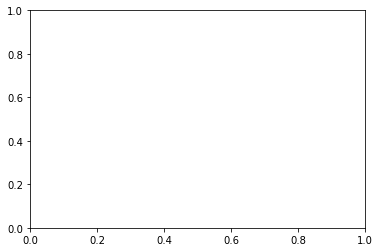

In [29]:
plt.hist(vectorizer.vocabulary_.items(), bins=10**np.linspace(0, 3, 25))
#plt.title('Log scaled price distribution histogram')
#plt.xscale('log') 
plt.show()